# Cas Kaggle Individual - Aprenentatge Computacional 2021-2022

Marc Garrofé Urrutia - 1565644

Anàlisi de tumors cerebrals a través d'imatges IRM

Enllaç Kaggle : https://www.kaggle.com/jakeshbohaju/brain-tumor

In [1]:
# Imports :
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from IPython.display import Image, display
import seaborn as sns
from sklearn.datasets import make_regression
import time

import scipy.stats
%matplotlib notebook

import warnings
warnings.simplefilter("ignore")

In [2]:
# Constants :
IMG_DATASET_PATH = 'data/Img/Brain Tumor'
CSV_DATASET_PATH = 'data/Brain Tumor.csv'
IMG_RES_X = 240
IMG_RES_Y = 240
SPLIT_RATIO = 0.2

PLOT = False
SAVE_PLOTS = False

In [3]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset(CSV_DATASET_PATH)

# Guardem dades d'entrada
x = dataset.values[:,2:-1]
# Guardem dades sortida
y = dataset.values[:,1:2]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (3762, 15)
Dimensionalitat de les entrades X (3762, 12)
Dimensionalitat de l'atribut Y (3762, 1)


In [4]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64


Observem que no hi han dades NULL. Això ens serà molt útil perquè facilita molt l'anàlisi de dades al no haver de tractar forats en blanc al dataset.

In [5]:
# Per visualitzar les primeres 5 mostres de la BBDD:
dataset.head()                

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535,619.588,24.892,0.109,4.276,18.901,98.614,0.293,0.086,0.531,4.473,0.982,0.000
1,Image2,0,8.750,805.958,28.389,0.267,3.718,14.465,63.859,0.475,0.226,0.651,3.220,0.989,0.000
2,Image3,1,7.341,1143.808,33.820,0.001,5.062,26.480,81.867,0.032,0.001,0.268,5.982,0.978,0.000
3,Image4,1,5.958,959.712,30.979,0.001,5.678,33.429,151.230,0.032,0.001,0.244,7.701,0.964,0.000
4,Image5,0,7.315,729.541,27.010,0.147,4.283,19.079,174.989,0.344,0.118,0.501,6.835,0.973,0.000


In [6]:
# Per veure estadístiques dels atributs numèrics de la BBDD:
dataset.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000
mean,0.447,9.489,711.101,25.182,0.074,4.103,24.389,127.961,0.205,0.059,0.479,4.698,0.956,0.000
std,0.497,5.728,467.467,8.774,0.070,2.561,56.435,109.500,0.129,0.058,0.128,1.850,0.026,0.000
min,0.000,0.079,3.146,1.774,0.001,1.886,3.942,3.195,0.025,0.001,0.105,0.681,0.549,0.000
25%,0.000,4.982,363.225,19.058,0.007,2.620,7.253,72.125,0.070,0.005,0.365,3.412,0.947,0.000
50%,0.000,8.478,622.580,24.952,0.067,3.422,12.359,106.737,0.225,0.051,0.513,4.482,0.962,0.000
75%,1.000,13.213,966.954,31.096,0.113,4.652,22.640,161.059,0.299,0.089,0.576,5.724,0.971,0.000
max,1.000,33.240,2910.582,53.950,0.395,36.931,1371.640,3382.574,0.590,0.348,0.811,27.828,0.990,0.000


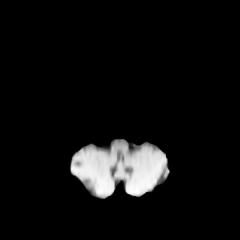

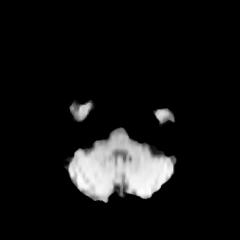

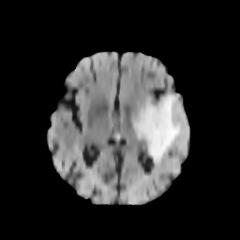

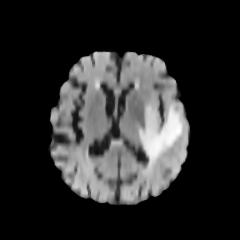

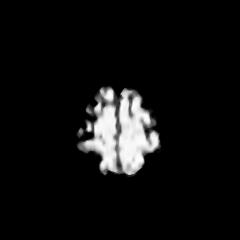

In [7]:
def showImg(dataset):
    """
    Given a dataset, shows the brain image
    :param dataset: Pandas DataFrame object
    """
    for img in dataset.iloc[:,0]:
        path = IMG_DATASET_PATH +"/" + img + ".jpg"
        display(Image(filename=path))
    

showImg(dataset.head())        

<IPython.core.display.Javascript object>


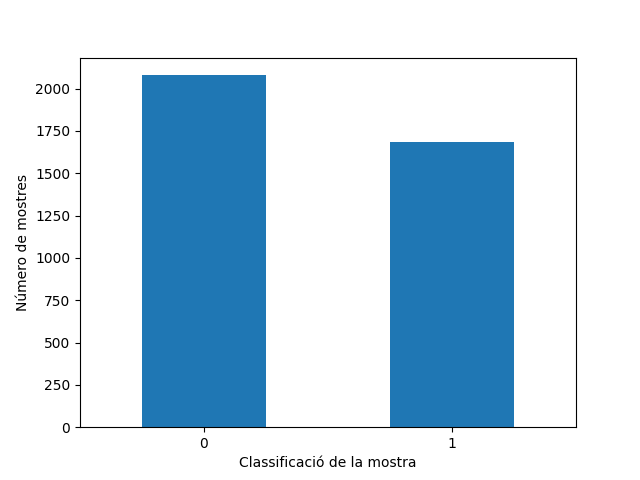

Text(0, 0.5, 'Número de mostres')

In [8]:
# Mostrem atribut 1 o Atribut Objectiu
plt.figure()
dataset['Class'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Classificació de la mostra')
plt.ylabel('Número de mostres')

In [9]:
# Mostrem la distribució de les dades segons la correlació
if PLOT:
    pd.plotting.scatter_matrix(dataset.drop(['Image'], axis=1), figsize=(20,20))
if SAVE_PLOTS:
    plt.savefig('scatter_matrix.png')

### FEATURE SELECTION

Consisteix en seleccionar aquells atributs més rellevants per reduir el nombre de variables amb les que treballarem.

Aquesta funció té un impacte en el cost computacional perquè disminueixm el temps necessari de calcul.

PERDEM SCORE, 3 PUNTS MENYS

<IPython.core.display.Javascript object>


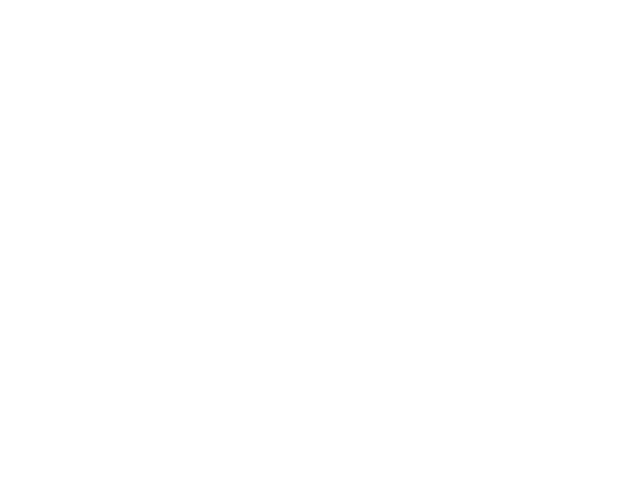

In [10]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

if PLOT:
    sns.heatmap(correlacio, annot=True, linewidths=.5)
if SAVE_PLOTS:
    plt.savefig('heatmap_correlacio.png')

A continuació analitzarem la correlació entre les dades.

Observem el següent:
Aquelles més relacionades amb l'estat objectiu, és a dir l'atribut "Class":

* Entropy
* Energy
* ASM
* Homogenity



In [11]:
# S¡elimina la columna Image perquè no ens aporta cap tipus d'informació
dataset = dataset.drop('Image', axis=1)

# Definim una llista amb els atributs menys rellevants per tal de poder eliminar-los en les diferents proves:
list_features = ['Mean', 'Variance', 'Coarseness', 'Contrast', 'Correlation', 'Dissimilarity', 'Kurtosis', 'Skewness']

# Guardem dades d'entrada
x = dataset.values[:,1:-1]

# Guardem dades sortida
y = dataset.values[:,0]


Definim funció per gestionar la estandarització de les dades

In [12]:
def featureSelection(dataset, list_features):
    """
    Donada una llista dels atributs NO rellevants, els elimina del dataset
    :param dataset: Objecte DataFrame amb les dades del dataset
    :param list_features: Llista amb els labels de les columnes a eliminar
    :return: Dataset amb les columnes rebudes eliminades
    """
    return dataset.drop(list_features, axis=1)


In [13]:
# Mirem la relació entre atributs utilitzant la funció pairplot
if PLOT:
    sns.pairplot(featureSelection(dataset, list_features))

In [14]:
if PLOT:
    sns.pairplot(featureSelection(dataset, list_features),
                        x_vars=["Entropy", "Energy", "ASM", "Homogeneity"],
                        y_vars=["Class"]
                )


# ESTANDARITZACIÓ DE LES DADES
A continuació es normalitzaran les dades per tal de poder 

In [15]:
from sklearn.preprocessing import StandardScaler
def standaritzador(data):
    """
    Given a DataFrame, standarizes all the columns
    :param data: DataFrame data
    :return: DataFrame data standarized
    """
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

# GRÀFIQUES I ESTADÍSTIQUES DELS MODELS
Definim funcions per mostrar el comportament del model i poder així comparar-los

In [16]:
def printModelScore(model, X_train, y_train, X_test, y_test):
    """
    Given a models and the train and test data, prints the model score and MSE in training and test
    :param model: Model
    :param X_train: Input data train
    :param y_train: Outuput data train
    :param X_test: Input data test
    :param y_test: Outuput data test
    """
    print ('Training Score:', model.score(X_train, y_train) )
    print ('Testing Score:', model.score(X_test, y_test) )
    print ('Training MSE: ', np.mean((model.predict(X_train) - y_train)**2))
    print ('Testing MSE: ', np.mean((model.predict(X_test) - y_test)**2))

# DIVISIÓ EN TRAIN i TEST

Una vegada hem visualitzat totes les dades, les separem en train i test per tal de no barrejar les dades.
Farem una divisió simple amb la funció propia de sklearn anomenada : train_test_split()

Abans pero, eliminarem aquelles columnes que hem vist que no tenen un grau de correl·lació tan elevat i posteriorment farem la divisió de train i test.

In [17]:
from sklearn.model_selection import train_test_split

# Divisió Train i Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=SPLIT_RATIO)

Separat el dataset en train i test,


# SELECCIÓ DEL MODEL
Utilitzarem diferents models de classificació, juntament amb l'eina Grid Search, per trobar el model que ens dongui millors resultats. Els models que es provaran:
* Regrsssor Logístic
* Gradient Descent
* Suported Vector Classfication
* Random Forest
* Naive Bayes

Definim també una funció que ens mostrarà la informació d'aplicar el Grid Search

In [18]:
from sklearn.model_selection import GridSearchCV

def gridSearch(estimator, param_grid, model_name, dataset, standaritze=False):
    """
    Executes the GridSearchCV function ans shows the statistics
    :param estimator: Model object to be tested
    :param param_grid: Dict with the diferent values to be tested
    :param model_name: String with the title to be shown
    :param dataset: DataFrame amb la informació i dades del dataset
    :param standarize: Boleà que estandaritza les dades d'entrada en cas de ser True
    """
    x = dataset.values[:,1:-1] # Guardem dades d'entrada
    if standaritze:
        x = standaritzador(x)
    y = dataset.values[:,0] # Guardem dades sortida
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=SPLIT_RATIO)
    start = time.time()
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    end = time.time()
    print(model_name + " Time : " + str(end - start) )
    print(grid_search.best_params_)
    print(grid_search.best_score_)

## REGRESOR LOGISTIC

A continuació s'aplicarà un regresor logistic i s'obtindrà unes mètriques per estudiar el seu comportament.
Definim els paràmetres del Grid Search i preparem les dades del model

In [19]:
param_grid = [
    {
        'penalty' : ['l2'],
        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'warm_start' : ['True', 'False']
    },
    {
        'penalty' : ['l1'],
        'solver' : ['liblinear', 'saga'],
        'warm_start' : ['True', 'False']
    }
]

from sklearn import linear_model

logistic_regressor1 = linear_model.LogisticRegression() # Definim model reg. logistic
gridSearch(logistic_regressor1, param_grid, 'Logistic Regression', dataset) # Crida funció que entrena i mostra resultats

logistic_regressor2 = linear_model.LogisticRegression()
gridSearch(logistic_regressor2, param_grid, 'Logistic Regression & Estandarització', dataset, standaritze=True)

logistic_regressor3 = linear_model.LogisticRegression()
gridSearch(logistic_regressor3, param_grid, 'Logistic Regression & Feature Selection', featureSelection(dataset, list_features))

logistic_regressor4 = linear_model.LogisticRegression()
gridSearch(logistic_regressor4, param_grid, 'Logistic Regression & Feature Selection & Estandarització', featureSelection(dataset, list_features), standaritze=True)


Logistic Regression Time : 4.461518049240112
{'penalty': 'l1', 'solver': 'liblinear', 'warm_start': 'False'}
-0.01728514491351623
Logistic Regression & Estandarització Time : 1.8699610233306885
{'penalty': 'l2', 'solver': 'newton-cg', 'warm_start': 'True'}
-0.01728293375934904
Logistic Regression & Feature Selection Time : 1.1647727489471436
{'penalty': 'l1', 'solver': 'liblinear', 'warm_start': 'True'}
-0.024923024195554474
Logistic Regression & Feature Selection & Estandarització Time : 0.9510221481323242
{'penalty': 'l2', 'solver': 'newton-cg', 'warm_start': 'True'}
-0.02592467703329445


Una vegada entrenat el model, creem una funció per obtenir les estadístiques del model



## GRADIENT DESCENT

El Descens de Gradient és un algorisme d'optimització que ajusta el valors dels pesos de cada atribut per tal de reduir l'error o el MSE fa augmentar la accuraccy.

In [20]:
param_grid = {
        'penalty' : ['l2', 'l1', 'elasticent'],
        'loss' : ['hinge', 'log'],
        'alpha' : [0.00001, 0.0001, 0.001],
        'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'],
        'warm_start' : ['True', 'False'],
        'max_iter' : [5000],
        'shuffle' : [True, False],
        'class_weight' : ['balanced'],
        'fit_intercept' : [True, False]
    }

from sklearn.linear_model import SGDClassifier
gradient_descent1 = SGDClassifier()
gridSearch(gradient_descent1, param_grid, 'Gradient Descent', dataset)

gradient_descent2 = SGDClassifier()
gridSearch(gradient_descent2, param_grid, 'Gradient Descent & Estandarització', dataset, standaritze=True)

gradient_descent3 = SGDClassifier()
gridSearch(gradient_descent3, param_grid, 'Gradient Descent & Feature Selection ', featureSelection(dataset, list_features))

gradient_descent4 = SGDClassifier()
gridSearch(gradient_descent4, param_grid, 'Gradient Descent & Estandarització & Feature Selection', featureSelection(dataset, list_features), standaritze=True)


Gradient Descent Time : 14.256796836853027
{'alpha': 1e-05, 'class_weight': 'balanced', 'fit_intercept': True, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 5000, 'penalty': 'l1', 'shuffle': False, 'warm_start': 'True'}
-0.13392684396437832
Gradient Descent & Estandarització Time : 5.4299681186676025
{'alpha': 0.001, 'class_weight': 'balanced', 'fit_intercept': True, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 5000, 'penalty': 'l1', 'shuffle': False, 'warm_start': 'True'}
-0.016284597652859854
Gradient Descent & Feature Selection  Time : 7.2434401512146
{'alpha': 0.0001, 'class_weight': 'balanced', 'fit_intercept': True, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 5000, 'penalty': 'l1', 'shuffle': False, 'warm_start': 'True'}
-0.028911946313176822
Gradient Descent & Estandarització & Feature Selection Time : 3.9063518047332764
{'alpha': 0.001, 'class_weight': 'balanced', 'fit_intercept': True, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 500

Observem que Gradient Descent perd accuracy quan les dades no estan estandaritzades i a la vegada no són les més característiques. Això és degut a que la distància entre cada iteració no és proporcional ni igual en totes les direccions i l'algorisme no convergeix.
Si estandaritzem, la distància en cada dimensió és proporcional i convergeix en un mínim.


## SVC


In [21]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto'],
    'class_weight' : ['None', 'balanced']
}

from sklearn.svm import SVC
svc1 = SVC(max_iter=10000)
gridSearch(svc1, param_grid, 'SVC', dataset)

svc2 = SVC(max_iter=10000)
gridSearch(svc2, param_grid, 'SVC & Estandarització', dataset, standaritze=True)

svc3 = SVC(max_iter=10000)
gridSearch(svc3, param_grid, 'SVC & Feature Selection', featureSelection(dataset, list_features))

svc4 = SVC(max_iter=10000)
gridSearch(svc4, param_grid, 'SVC & Estandarització & Feature Selection' , featureSelection(dataset, list_features), standaritze=True)


SVC Time : 8.989294052124023
{'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
-0.21302922593020496
SVC & Estandarització Time : 1.3933720588684082
{'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
-0.015288472700537865
SVC & Feature Selection Time : 6.48661994934082
{'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
-0.03688592102862892
SVC & Estandarització & Feature Selection Time : 1.428008794784546
{'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
-0.027581384293066374


Observem que el model SVC sense dades estandaritzades no té tan accuracy i consumeix un temps elevat en executar-se



## RANDOM FOREST

In [22]:
param_grid = {
    'n_estimators' : [50, 75, 100],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'warm_start' : [True, False],
    'class_weight' : ['balanced', 'balanced_subsample']
}

from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
gridSearch(clf1, param_grid, 'Random Forest', dataset)

clf2 = RandomForestClassifier()
gridSearch(clf2, param_grid, 'Random Forest & Estandarització', dataset, standaritze=True)

clf3 = RandomForestClassifier()
gridSearch(clf3, param_grid, 'Random Forest & Feature Selection', featureSelection(dataset, list_features))

clf4 = RandomForestClassifier()
gridSearch(clf4, param_grid, 'Random Forest & Estandarització & Feature Selection', featureSelection(dataset, list_features), standaritze=True)


Random Forest Time : 98.9421398639679
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 50, 'warm_start': True}
-0.00964173774606


KeyboardInterrupt: 

## NAIVE BAYES

Bayes requereix que les dades segueixin una distribució Gaussiana. Provarem dues execucions:
* Naive Bayes + Estandarització
* Naive Bayes + Estandarització + Feature Selection

In [40]:
param_grid = {
}

from sklearn.naive_bayes import GaussianNB

gnb1 = GaussianNB()
gridSearch(gnb1, param_grid, 'Bayes', dataset)

gnb2 = GaussianNB()
gridSearch(gnb2, param_grid, 'Bayes & Estandarització', dataset, standaritze=True)

gnb3 = GaussianNB()
gridSearch(gnb3, param_grid, 'Bayes &  Feature Selection', featureSelection(dataset, list_features))

gnb4 = GaussianNB()
gridSearch(gnb4, param_grid, 'Bayes & Estandarització &  Feature Selection', featureSelection(dataset, list_features), standaritze=True)

Bayes Time : 0.016762971878051758
{}
-0.03389920453728835
Bayes & Estandarització Time : 0.012775897979736328
{}
-0.03423087766236781
Bayes &  Feature Selection Time : 0.01190805435180664
{}
-0.02791969088064743
Bayes & Estandarització &  Feature Selection Time : 0.011287927627563477
{}
-0.02625413900420672


Tot i que no aconsegueix una accuracy tan elevada com altres models, aquest és el que s'executa i genera una predicció de manera més ràpida.
En el cas d'una deicisió mèdica, on el temps de predicció no és critic quan es tracta de l'ordre de segons o minuts, concluim que aquest model és veloç pero no és una qualitat que busquem a l'hora de resodlre aquest problema

# VALIDACIÓ DELS RESULTATS

Una vegada hem obtingut les millors configuracions per als diferents models. Validarem els millors models amb el conjunt de dades de testing.

Definim una funció per validar els millors models:

In [37]:
def validateModel(model, model_name, dataset, standaritze=False):
    """
    Given a model and a dataset, prints the elapsed time for fiting and the score of the model
    :param model_name: String amb el nom o descripció del model
    :param model: Model to be tested
    :param dataset: Fataframe object with the dataset data
    :param standaritze: Boleà que estandaritza les dades en cas que aquest sigui True
    """
    x = dataset.values[:,1:-1] # Guardem dades d'entrada
    if standaritze:
        x = standaritzador(x)
    y = dataset.values[:,0] # Guardem dades sortida
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=SPLIT_RATIO)
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    print()
    print(model_name, ' - Time: ', end - start)
    print ('Testing Score:', model.score(X_test, y_test) )
    print ('Testing MSE: ', np.mean((model.predict(X_test) - y_test)**2))

In [46]:
logistic_regressor_test = linear_model.LogisticRegression(penalty='l2', solver='newton-cg', warm_start=True)
validateModel(logistic_regressor_test, 'Regresor Logistic & Estandarització', dataset, standaritze=True)

gradient_descent2 = SGDClassifier(alpha=0.001, class_weight='balanced', fit_intercept=True, learning_rate='optimal', loss='log', max_iter=5000, penalty='l2', shuffle=True, warm_start=True)
validateModel(gradient_descent2, 'Gradient descent & Estandarització', dataset, standaritze=True)

svc_test = SVC(max_iter=10000, class_weight='balanced', gamma='scale', kernel='linear')
validateModel(svc_test, 'SVC & Estandarització', dataset, standaritze=True)

clf_test = RandomForestClassifier(class_weight='balanced_subsample', criterion='gini', max_features='auto', n_estimators=75, warm_start=True)
validateModel(clf_test, 'Random Forest', dataset, standaritze=False)

gnb_test = GaussianNB()
validateModel(gnb_test, 'Naive Bayes & Feature Selection', featureSelection(dataset, list_features), standaritze=False)



Regresor Logistic & Estandarització  - Time:  0.02440190315246582
Testing Score: 0.9853917662682603
Testing MSE:  0.014608233731739707

Gradient descent & Estandarització  - Time:  0.005867958068847656
Testing Score: 0.9867197875166003
Testing MSE:  0.013280212483399735

SVC & Estandarització  - Time:  0.02543807029724121
Testing Score: 0.9840637450199203
Testing MSE:  0.01593625498007968

Random Forest  - Time:  0.3486039638519287
Testing Score: 0.9907038512616202
Testing MSE:  0.009296148738379814

Naive Bayes & Feature Selection  - Time:  0.0011031627655029297
Testing Score: 0.9721115537848606
Testing MSE:  0.027888446215139442


Per a diferents execucions dels models, Gradient Descent i Random Forest obtenen els millors resultats. En algunes execucions, l'accuracy arriba fins el 99% per als dos casos

# CONCLUSIONS


# TO DO:
Combianció de models

Bagging and Boosting??

Recall?? -> Seleccionar Treshall

Guardar millor model per tal que accepi noves dades?? .py -> Demo.py

Readme (Mirar Caronte) -> Objectius, descripcio, enllaç presentacio, comparativa grafiques ia altres model

Notebook conclusions

Presentacio 3 minuts -> Mirar pwp amb el que demanen (Millores, resultats)

Mostrar imatges tumors mal classificats -> Que tenen en comu? Com son?

Generar ROC Curve i grafiques dels resultats